Kaggle: https://www.lintcode.com/ai/bike-sharing/data

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
TRAIN_DIR = './input/train.csv'
TEST_DIR = './input/test.csv'

# Explantory Data Analyisis - Take a Glance at the Data

In [3]:
train = pd.read_csv(TRAIN_DIR, sep=',', header=0)
test = pd.read_csv(TEST_DIR, sep=',', header=0)
print(f'training set shape: {train.shape}')
print(f'test set shape: {test.shape}')

training set shape: (8600, 12)
test set shape: (2286, 9)


In [4]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-16 00:00:00,1,0,0,1,10.66,15.150,56,0.0000
1,2011-01-16 01:00:00,1,0,0,1,10.66,13.635,56,8.9981
2,2011-01-16 02:00:00,1,0,0,1,10.66,14.395,56,6.0032
3,2011-01-16 03:00:00,1,0,0,1,9.02,13.635,69,0.0000
4,2011-01-16 04:00:00,1,0,0,1,10.66,12.880,56,11.0014


Observations:<br>
1.There are 8600 data points in training set and 2286 in test set.<br>
2.There are 9 features.

In [6]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,8600.000000,8600.000000,8600.000000,8600.00000,8600.000000,8600.000000,8600.000000,8600.000000,8600.000000,8600.000000,8600.000000
mean,2.505581,0.027791,0.682558,1.41000,20.119653,23.560989,61.590581,12.756693,35.689419,154.840814,190.530233
std,1.116628,0.164382,0.465508,0.63234,8.000975,8.690173,19.468443,8.209822,49.571896,150.760096,180.631042
min,1.000000,0.000000,0.000000,1.00000,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.00000,13.940000,16.665000,46.000000,7.001500,4.000000,36.000000,41.000000
50%,3.000000,0.000000,1.000000,1.00000,20.500000,24.240000,61.000000,11.001400,16.000000,118.000000,144.000000
75%,4.000000,0.000000,1.000000,2.00000,27.060000,31.060000,78.000000,16.997900,48.000000,221.000000,282.000000
max,4.000000,1.000000,1.000000,4.00000,41.000000,45.455000,100.000000,56.996900,362.000000,886.000000,977.000000


In [7]:
train.isnull().any()

datetime      False
season        False
holiday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
casual        False
registered    False
count         False
dtype: bool

In [8]:
test.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,2286.000000,2286.000000,2286.000000,2286.000000,2286.000000,2286.000000,2286.000000,2286.000000
mean,2.510499,0.031496,0.674541,1.450131,20.649221,24.009073,62.999563,12.960042
std,1.114701,0.174692,0.468649,0.638589,6.933237,7.600437,18.341652,7.991602
min,1.000000,0.000000,0.000000,1.000000,4.100000,6.060000,8.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,15.580000,19.695000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,24.240000,64.000000,12.998000
75%,4.000000,0.000000,1.000000,2.000000,25.420000,30.305000,77.000000,16.997900
max,4.000000,1.000000,1.000000,3.000000,38.540000,43.940000,100.000000,50.002100


In [9]:
test.isnull().any()

datetime      False
season        False
holiday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
dtype: bool

Observations: <br>
1.There are no missing data in training.<br>
2.Four Categorical Features: 'season', 'holiday', 'working day' and 'weather'.<br>
3.Four Numeric Features: 'temp', 'atemp', 'humidity', 'windspeed'.<br>
4.One Datetime Feature: 'Datetime'.<br>
5.Looking at the mean and stdev of 8 features in both the training set and test set, the values are similar, which means the distribuions are similar.<br>

# Explantory Data Analyisis - Research on Label

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
from scipy.stats import skew, norm

1.239241376322606

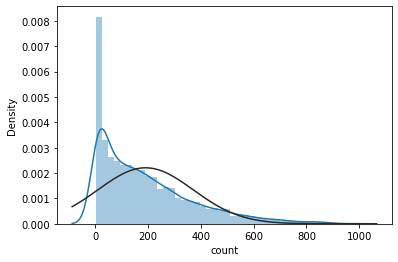

In [12]:
sns.distplot(train['count'], fit=norm)
skew(train['count'])

Observations:<br>
1.The 'count' is integer within 1 to 977. It's a positive number. But most models' prediction is $(-\inf, \inf).$<br>
2.The skewness of 'count' is far from zero. We want it as small as possible. <br>
3.The evaluation function is $\sqrt{(\log(true+1)-\log(pred+1)^2)}$, which is the MSE of $\log(count+1)$. <br>
4.Thus, we can take the $\log(count+1)$ transformation.

In [13]:
train['log_count'] = train['count'].apply(lambda x: np.log2(x + 1))

-0.8494341585491002

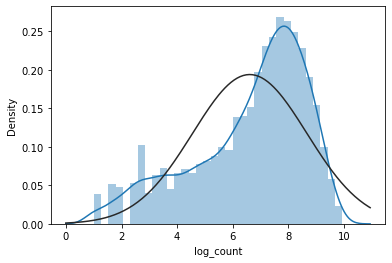

In [14]:
sns.distplot(train['log_count'], fit=norm)
skew(train['log_count'])

Observations:<br>
1.The skewness drops to 0.85.

# Explantory Data Analyisis - Research on Features

1.Transform Feature 'datetime'

In [15]:
from datetime import date

In [16]:
def transform_datetime(dataset):    
    dataset['year'] = dataset['datetime'].apply(lambda x: int(x[0:4]))
    dataset['month'] = dataset['datetime'].apply(lambda x: int(x[5:7]))
    dataset['day'] = dataset['datetime'].apply(lambda x: int(x[8:10]))
    dataset['weekday'] = dataset['datetime'].apply(lambda x: date(*(int(i) for i in x[0:10].split('-'))).weekday() + 1)
    dataset['hour'] = dataset['datetime'].apply(lambda x: int(x[11:13]))

In [17]:
transform_datetime(train)
transform_datetime(test)

In [18]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,log_count,year,month,day,weekday,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,4.087463,2011,1,1,6,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,5.357552,2011,1,1,6,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,5.044394,2011,1,1,6,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3.807355,2011,1,1,6,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1.000000,2011,1,1,6,4


2.Research in Numberic Features

In [19]:
from sklearn.feature_selection import mutual_info_regression

In [20]:
NUMERIC_COL = ['temp','atemp', 'humidity', 'windspeed']
Y_COL = ['log_count']

<AxesSubplot:>

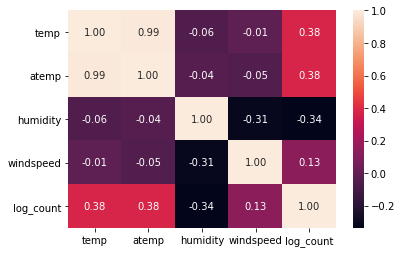

In [21]:
# Linear Correlation
plt.subplots(figsize=(6, 4))
sns.heatmap(train[NUMERIC_COL+Y_COL].corr(), annot=True, fmt='.2f')

In [22]:
# Non-linear Correlation
mut_inf_reg = mutual_info_regression(train[NUMERIC_COL], train[Y_COL])
pd.Series(mut_inf_reg, index=train[NUMERIC_COL].columns).sort_values(ascending=False)

temp         0.161617
atemp        0.144756
humidity     0.105609
windspeed    0.027990
dtype: float64

Observations:<br>
1.Important Features: 'temp', 'atemp', 'humidity'.

3.Research in Categorical Features

In [23]:
CATEGORICAL_COL = ['season', 'holiday', 'workingday', 'weather', 'hour', 'year', 'month', 'day', 'weekday']

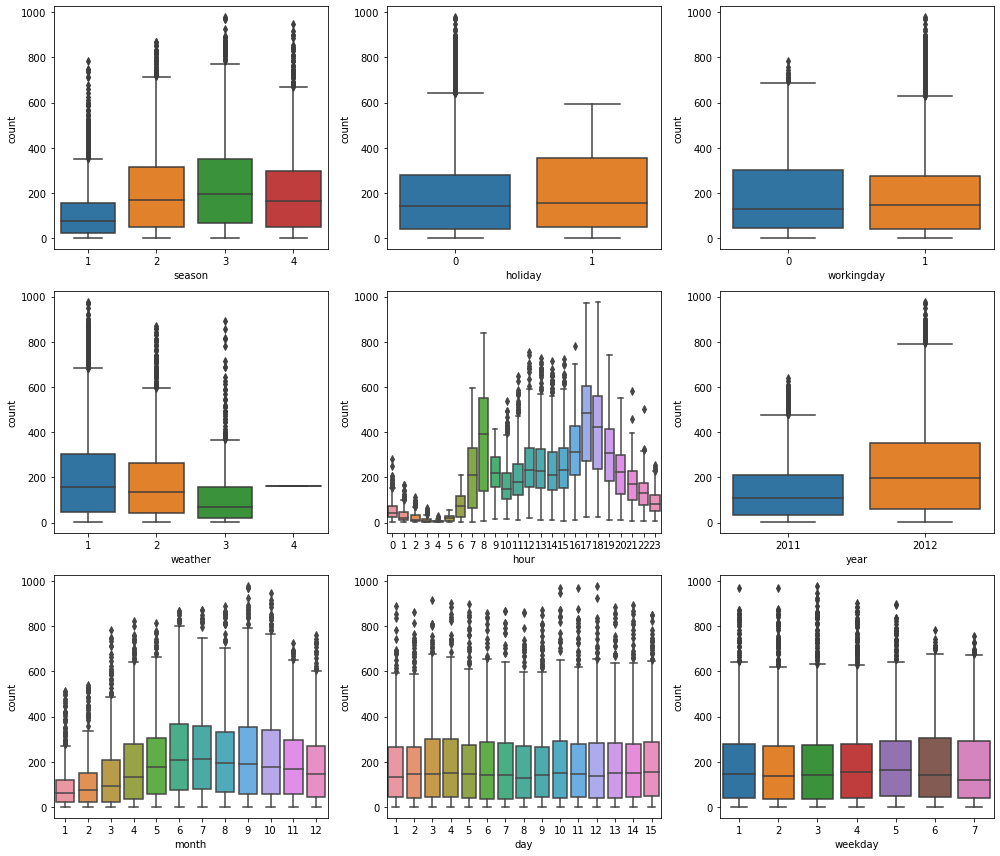

In [24]:
fig, _ = plt.subplots(figsize=(14, 12))
for i in range(9):
    plt.subplot(f'33{str(i+1)}')
    sns.boxplot(CATEGORICAL_COL[i], 'count', data=train)
fig.tight_layout()

Observations:<br>
1.Important Features: 'hour', 'season', 'year', 'month', 'weather'.

# Prepare Data

In [25]:
ID_COL = ['datetime']
X_COL = NUMERIC_COL+CATEGORICAL_COL
X_train, y_train = train[X_COL], train[Y_COL]
X_test = test[ID_COL + X_COL]

1.Get Dummies for Categorical Features

In [26]:
DUMMY_COL = ['season', 'holiday', 'workingday', 'weather']
X_train = pd.get_dummies(X_train, columns = DUMMY_COL, drop_first=False)
X_test = pd.get_dummies(X_test, columns = DUMMY_COL, drop_first=False)
X_test['weather_4'] = 0 # There is no weather 4 in the test set.

In [27]:
CATEGORICAL_COL = ['hour', 'year', 'month', 'day', 'weekday',
                   'season_1', 'season_2', 'season_3', 'season_4', 
                   'holiday_0', 'holiday_1', 
                   'workingday_0', 'workingday_1', 
                   'weather_1', 'weather_2', 'weather_3', 'weather_4']
X_COL = NUMERIC_COL + CATEGORICAL_COL

2.Normalization

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=X_COL)

test_ids, test_data = X_test[ID_COL], X_test[X_COL]
X_test = pd.concat([test_ids, 
                    pd.DataFrame(scaler.transform(test_data), columns=X_COL)], 
                   axis=1)

3.Take a Final for the Data

In [30]:
X_train.head()

,temp,atemp,humidity,windspeed,hour,year,month,day,weekday,season_1,...,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_1,weather_2,weather_3,weather_4
0,-1.284875,-1.054815,0.997026,-1.553924,-1.668536,-1.003028,-1.600774,-1.61915,0.991622,1.744492,...,-0.578603,-0.578961,0.169071,-0.169071,1.46635,-1.46635,0.703656,-0.58111,-0.29208,-0.010784
1,-1.387368,-1.142275,0.945658,-1.553924,-1.523927,-1.003028,-1.600774,-1.61915,0.991622,1.744492,...,-0.578603,-0.578961,0.169071,-0.169071,1.46635,-1.46635,0.703656,-0.58111,-0.29208,-0.010784
2,-1.387368,-1.142275,0.945658,-1.553924,-1.379318,-1.003028,-1.600774,-1.61915,0.991622,1.744492,...,-0.578603,-0.578961,0.169071,-0.169071,1.46635,-1.46635,0.703656,-0.58111,-0.29208,-0.010784
3,-1.284875,-1.054815,0.688817,-1.553924,-1.234709,-1.003028,-1.600774,-1.61915,0.991622,1.744492,...,-0.578603,-0.578961,0.169071,-0.169071,1.46635,-1.46635,0.703656,-0.58111,-0.29208,-0.010784
4,-1.284875,-1.054815,0.688817,-1.553924,-1.090100,-1.003028,-1.600774,-1.61915,0.991622,1.744492,...,-0.578603,-0.578961,0.169071,-0.169071,1.46635,-1.46635,0.703656,-0.58111,-0.29208,-0.010784


In [31]:
X_test.head()

,datetime,temp,atemp,humidity,windspeed,hour,year,month,day,weekday,...,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_1,weather_2,weather_3,weather_4
0,2011-01-16 00:00:00,-1.182381,-0.967930,-0.287178,-1.553924,-1.668536,-1.003028,-1.600774,1.85161,1.492411,...,-0.578603,-0.578961,0.169071,-0.169071,1.46635,-1.46635,0.703656,-0.58111,-0.29208,-0.010784
1,2011-01-16 01:00:00,-1.182381,-1.142275,-0.287178,-0.457843,-1.523927,-1.003028,-1.600774,1.85161,1.492411,...,-0.578603,-0.578961,0.169071,-0.169071,1.46635,-1.46635,0.703656,-0.58111,-0.29208,-0.010784
2,2011-01-16 02:00:00,-1.182381,-1.054815,-0.287178,-0.822659,-1.379318,-1.003028,-1.600774,1.85161,1.492411,...,-0.578603,-0.578961,0.169071,-0.169071,1.46635,-1.46635,0.703656,-0.58111,-0.29208,-0.010784
3,2011-01-16 03:00:00,-1.387368,-1.142275,0.380608,-1.553924,-1.234709,-1.003028,-1.600774,1.85161,1.492411,...,-0.578603,-0.578961,0.169071,-0.169071,1.46635,-1.46635,0.703656,-0.58111,-0.29208,-0.010784
4,2011-01-16 04:00:00,-1.182381,-1.229160,-0.287178,-0.213816,-1.090100,-1.003028,-1.600774,1.85161,1.492411,...,-0.578603,-0.578961,0.169071,-0.169071,1.46635,-1.46635,0.703656,-0.58111,-0.29208,-0.010784


# Evaluation with Cross Validation

In [32]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

In [33]:
def rmse_cv(model, X_train, y_train):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    mse = - cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)
    rmse = np.sqrt(mse)
    return rmse.mean()

# Models

1.KNN

In [34]:
from sklearn.neighbors import KNeighborsRegressor
rmse_cv(KNeighborsRegressor(n_neighbors=5), X_train, y_train)

1.3207042921759236

2.Regression Tree

In [35]:
from sklearn.tree import DecisionTreeRegressor
rmse_cv(DecisionTreeRegressor(), X_train, y_train)

0.6246867317946982

3.Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression
rmse_cv(LinearRegression(), X_train, y_train)

1.4530857313004444

In [37]:
from sklearn.linear_model import Ridge
rmse_cv(Ridge(alpha=0.5), X_train, y_train)

1.4530838820144534

4.ElasticNet

In [38]:
from sklearn.linear_model import ElasticNet
rmse_cv(ElasticNet(alpha=0.02, l1_ratio=0.8), X_train, y_train)

1.4538864370033902

5.GBDT

In [39]:
from sklearn.ensemble import GradientBoostingRegressor
gb_r = GradientBoostingRegressor(
    n_estimators=3000, learning_rate=0.05, max_depth=4, 
    max_features='sqrt', min_samples_leaf=15, min_samples_split=10, loss='huber')
rmse_cv(gb_r, X_train, y_train)

0.41046983904441037

6.XGBOOST

In [40]:
import xgboost as xgb
xgb_r = xgb.XGBRegressor(
    n_estimators=500, learning_rate=0.05, max_depth=5, gamma=0.048, 
    colsample_bytree=0.903, min_child_weight=0.7817, reg_alpha=0.7640, reg_lambda=0.8571,
    subsample=0.8213, verbosity=0, n_jobs = -1)
rmse_cv(xgb_r, X_train, y_train)

0.395290413268387

Observation: <br>
The best model is XGBOOST.

# Hyperparameter Tunning

In [41]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(xgb.XGBRegressor(), scoring="neg_mean_squared_error", cv=5, verbose=7,
                  param_grid={"n_estimators": [100, 200, 500, 1000, 2000], 
                              "max_depth":[5, 6, 7]}, )
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] max_depth=5, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... max_depth=5, n_estimators=100, score=-0.970, total=   1.1s
[CV] max_depth=5, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV] ...... max_depth=5, n_estimators=100, score=-0.203, total=   1.1s
[CV] max_depth=5, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s


[CV] ...... max_depth=5, n_estimators=100, score=-0.339, total=   1.1s
[CV] max_depth=5, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.3s remaining:    0.0s


[CV] ...... max_depth=5, n_estimators=100, score=-0.208, total=   1.0s
[CV] max_depth=5, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.3s remaining:    0.0s


[CV] ...... max_depth=5, n_estimators=100, score=-0.223, total=   1.0s
[CV] max_depth=5, n_estimators=200 ...................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.3s remaining:    0.0s


[CV] ...... max_depth=5, n_estimators=200, score=-0.940, total=   2.0s
[CV] max_depth=5, n_estimators=200 ...................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    7.3s remaining:    0.0s


[CV] ...... max_depth=5, n_estimators=200, score=-0.209, total=   2.0s
[CV] max_depth=5, n_estimators=200 ...................................
[CV] ...... max_depth=5, n_estimators=200, score=-0.339, total=   2.0s
[CV] max_depth=5, n_estimators=200 ...................................
[CV] ...... max_depth=5, n_estimators=200, score=-0.208, total=   1.9s
[CV] max_depth=5, n_estimators=200 ...................................
[CV] ...... max_depth=5, n_estimators=200, score=-0.232, total=   2.0s
[CV] max_depth=5, n_estimators=500 ...................................
[CV] ...... max_depth=5, n_estimators=500, score=-0.995, total=   4.9s
[CV] max_depth=5, n_estimators=500 ...................................
[CV] ...... max_depth=5, n_estimators=500, score=-0.223, total=   4.9s
[CV] max_depth=5, n_estimators=500 ...................................
[CV] ...... max_depth=5, n_estimators=500, score=-0.344, total=   5.1s
[CV] max_depth=5, n_estimators=500 ...................................
[CV] .

[CV] ...... max_depth=7, n_estimators=500, score=-0.267, total=   7.2s
[CV] max_depth=7, n_estimators=1000 ..................................
[CV] ..... max_depth=7, n_estimators=1000, score=-1.160, total=  11.8s
[CV] max_depth=7, n_estimators=1000 ..................................
[CV] ..... max_depth=7, n_estimators=1000, score=-0.237, total=  12.0s
[CV] max_depth=7, n_estimators=1000 ..................................
[CV] ..... max_depth=7, n_estimators=1000, score=-0.409, total=  11.5s
[CV] max_depth=7, n_estimators=1000 ..................................
[CV] ..... max_depth=7, n_estimators=1000, score=-0.232, total=  11.7s
[CV] max_depth=7, n_estimators=1000 ..................................
[CV] ..... max_depth=7, n_estimators=1000, score=-0.268, total=  12.0s
[CV] max_depth=7, n_estimators=2000 ..................................
[CV] ..... max_depth=7, n_estimators=2000, score=-1.160, total=  14.5s
[CV] max_depth=7, n_estimators=2000 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  9.8min finished


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [42]:
grid_search.best_params_

{'max_depth': 6, 'n_estimators': 200}

# Choose the Best Model and Predict

In [44]:
xgb_r = xgb.XGBRegressor(
    n_estimators=200, learning_rate=0.05, max_depth=6, gamma=0.048, 
    colsample_bytree=0.903, min_child_weight=0.7817, reg_alpha=0.7640, reg_lambda=0.8571,
    subsample=0.8213, verbosity=0, n_jobs = -1)
xgb_r.fit(X_train, y_train)
y_test_pred = xgb_r.predict(X_test[X_COL])
pd.DataFrame({"datetime": X_test['datetime'], 
              "count": (2 ** (y_test_pred.reshape(-1)) - 1).astype(int)})\
             .to_csv('submission.csv',header=True, index=False)